# Diabetes prediction analysis

TODO - Write some introduction about your project here: describe the dataset, where you got it from, what you're trying to do with it, and which tools & techniques you're using. You can also mention about the course [Data Analysis with Python: Zero to Pandas](zerotopandas.com), and what you've learned from it.

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

**TODO** - add some explanation here

> Instructions for downloading the dataset (delete this cell)
>
> - Find an interesting dataset on this page: https://www.kaggle.com/datasets?fileType=csv
> - The data should be in CSV format, and should contain at least 3 columns and 150 rows
> - Download the dataset using the [`opendatasets` Python library](https://github.com/JovianML/opendatasets#opendatasets)

In [2]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [3]:
# Change this
dataset_url = 'https://www.kaggle.com/datasets/whenamancodes/predict-diabities' 

In [8]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./predict-diabities" (use force=True to force download)


The dataset has been downloaded and extracted.

In [9]:
# Change this
data_dir = './predict-diabities'

In [10]:
import os
os.listdir(data_dir)


['diabetes.csv']

In [11]:
import pandas as pd

Let us save and upload our work to Jovian before continuing.

In [12]:
project_name = "diabetes-prediction-data" # change this (use lowercase letters and hyphens only)

In [13]:
!pip install jovian --upgrade -q

In [14]:
import jovian

In [15]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "alphajack2006/diabetes-prediction-data" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/alphajack2006/diabetes-prediction-data


'https://jovian.com/alphajack2006/diabetes-prediction-data'

## Data Preparation and Cleaning

**TODO** - Write some explanation here.



> Instructions (delete this cell):
>
> - Load the dataset into a data frame using Pandas
> - Explore the number of rows & columns, ranges of values etc.
> - Handle missing, incorrect and invalid data
> - Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)

In [16]:
import pandas as pd
diabetes_raw = pd.read_csv(data_dir + "/diabetes.csv")

In [17]:
diabetes_raw.columns
#view all columns in the dataframe

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [18]:
# Most of the columns given in the dataframe are necessary to determine the prediction of contracting diabetes,
# Thus I will be keeping all columns.

diabetes_raw.describe()
#Describe.() helps the reader analyze a rough description of the data.

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

The minimum age for participants of this data is 21 while the maximum age is 81-- showing that the people who've contributed to the research are adults from the ages 21 to 81.

The standard deviation for the column Glucose is high at 31.9. This means there will be varying amounts of glucose levels that can showcase the predictions of diabetes relating to Blood Glucose concentration.

Additionally, the average BMI for the participants in the data is high at 31.99. 

In [19]:
diabetes_raw.info()
#This command allows me to see if there are invalid/incorrect datas within the data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [20]:
diabetes_raw.isnull().sum()
#This command checks for any null values that'll interfere with the analysis. As the sums of any null values is 0, the data is clean.

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Our dataframe contains zeros in datas that are not meant to have zeros, such as Glucose level, BMI, Blood pressure, Insulin and skin thickness. [Besides looking by eye, we can use the unique() function to check for any zeros in columns that are unrealistically placed.]

In [21]:
diabetes_BMI_col = diabetes_raw.BMI

In [22]:
diabetes_BMI_revamped = diabetes_BMI_col.replace(0, value = diabetes_BMI_col.mean(), inplace = True)

There is no more zeros in the BMI column. We will do the same thing for the rest.

In [23]:
diabetes_Glucose_col = diabetes_raw.Glucose

In [24]:
diabetes_Glucose_revamped = diabetes_Glucose_col.replace(0, value = diabetes_Glucose_col.median(), inplace = True)

#We are using median because the Glucose level's STD is high, meaning the values have great outliers. The median would
#be a more practical approach to subsitude zero. (it is an ordinal data)
#There is no more 0 in the array.

In [25]:
diabetes_Blood_pressure_col = diabetes_raw.BloodPressure

In [26]:
diabetes_Blood_pressure_revamped = diabetes_Blood_pressure_col.replace(0, value = diabetes_Blood_pressure_col.median(), inplace = True)
#Likewise, Blood pressure is continuous with great outliers-- changing it to mean would affect the STD
#No more zeros

In [27]:
diabetes_Insulin_col = diabetes_raw.Insulin

In [28]:
diabetes_Insulin_revamped = diabetes_Insulin_col.replace(0, value = diabetes_Insulin_col.median(), inplace = True)

In [29]:
diabetes_SkinThickness_col = diabetes_raw.SkinThickness

In [30]:
diabetes_SkinThickness_revamped = diabetes_SkinThickness_col.replace(0, diabetes_SkinThickness_col.median(), inplace = True)

In [31]:
diabetes_raw

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35     30.5  33.6   
1              1       85             66             29     30.5  26.6   
2              8      183             64             23     30.5  23.3   
3              1       89             66             23     94.0  28.1   
4              0      137             40             35    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48    180.0  32.9   
764            2      122             70             27     30.5  36.8   
765            5      121             72             23    112.0  26.2   
766            1      126             60             23     30.5  30.1   
767            1       93             70             31     30.5  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [32]:
diabetes_raw.describe()
#The data now does not contain unrealisitc zeros. 

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      27.334635   94.652344   
std       3.369578   30.438286      12.096642       9.229014  105.547598   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      23.000000   30.500000   
50%       3.000000  117.000000      72.000000      23.000000   31.250000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.450805                  0.471876   33.240885    0.348958  
std      6.875374                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [33]:
import jovian

In [34]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "alphajack2006/diabetes-prediction-data" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/alphajack2006/diabetes-prediction-data


'https://jovian.com/alphajack2006/diabetes-prediction-data'

## Exploratory Analysis and Visualization

**TODO** - write some explanation here.



> Instructions (delete this cell)
> 
> - Compute the mean, sum, range and other interesting statistics for numeric columns
> - Explore distributions of numeric columns using histograms etc.
> - Explore relationship between columns using scatter plots, bar charts etc.
> - Make a note of interesting insights from the exploratory analysis

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [35]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

# Exploring the distribution of pregnancies and ages in participants

Text(0, 0.5, 'Number of participants')

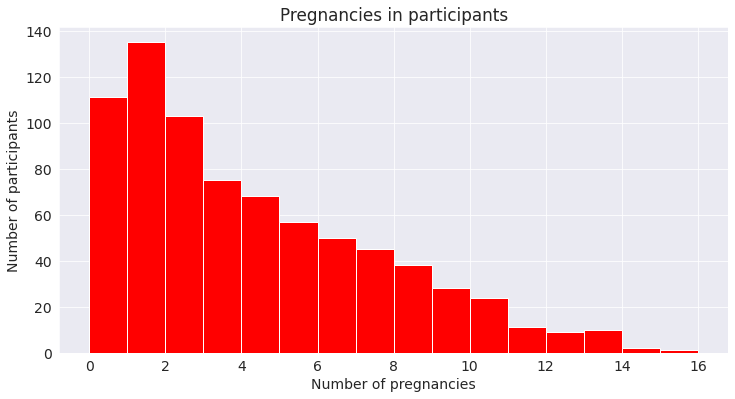

In [36]:
plt.hist(diabetes_raw.Pregnancies, bins = np.arange(0,17,1), color = 'red')
plt.title("Pregnancies in participants")
plt.xlabel("Number of pregnancies")
plt.ylabel("Number of participants")

From this diagram, we can infer that most participants of the data have underwent pregnancies. Although arbitrary, we can infer that most of the participants of the data are women/mothers. 

VV We'll check the distribution of the ages of the participants.

<AxesSubplot:xlabel='Age', ylabel='Count'>

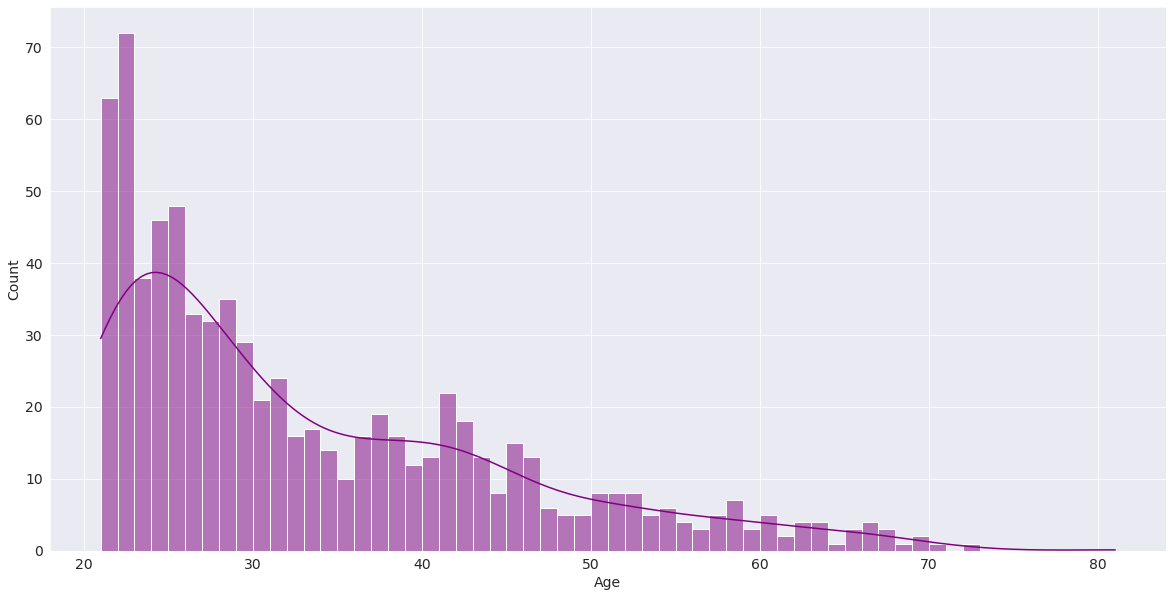

In [37]:
plt.figure(figsize = (20,10))
sns.histplot(diabetes_raw.Age, bins = np.arange(21, 81, 1), color = "Purple", kde = True)

Most participants are aged between 21 to 22 years old.

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

# Relationships between Glucose and diabetes Pedigree

The higher the value of the Diabetes Pedigree Function, the more chances of contracting Diabetes.

We will first plot the graph:

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Relationship of Glucose with Diabetes pedigree'}, xlabel='Glucose', ylabel='DiabetesPedigreeFunction'>

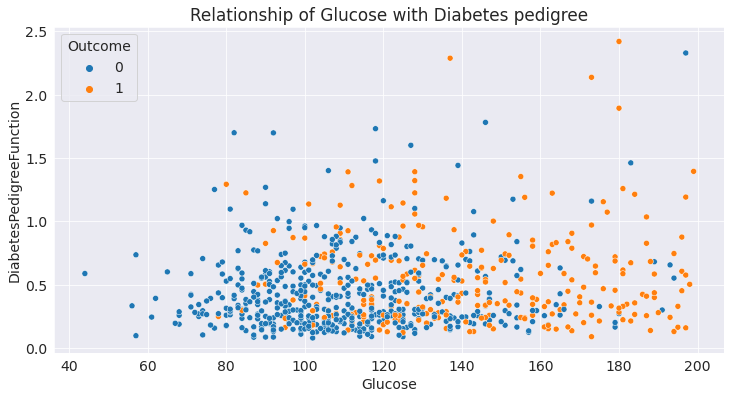

In [38]:
plt.title("Relationship of Glucose with Diabetes pedigree")
sns.scatterplot(diabetes_raw.Glucose , diabetes_raw.DiabetesPedigreeFunction, hue = diabetes_raw.Outcome)

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

# Exploring Age and Diabetes Pedigree

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='DiabetesPedigreeFunction'>

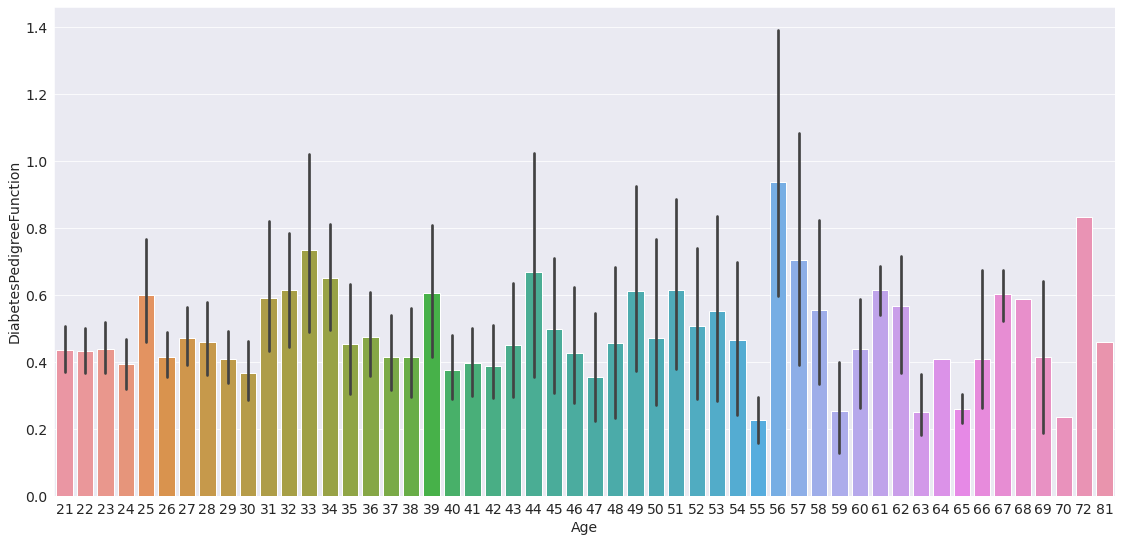

In [39]:
plt.figure(figsize=(19,9))
sns.barplot(diabetes_raw.Age, diabetes_raw.DiabetesPedigreeFunction)

Through this data, we can see that age is not the only factor for contracting Diabetes. Although the data suggests that people among the ages of 56 have a higher pedigree for getting diabetes, the data is very varied and inconsistent. It would be arbitrary to not use other health factors & lifestyle to calculate the prediction of getting Diabetes.

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

# Relationship of BMI  and Skin Thickness with Diabetes Pedigree

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Relationship of BMI & Diabetes Pedigree'}, xlabel='BMI', ylabel='DiabetesPedigreeFunction'>

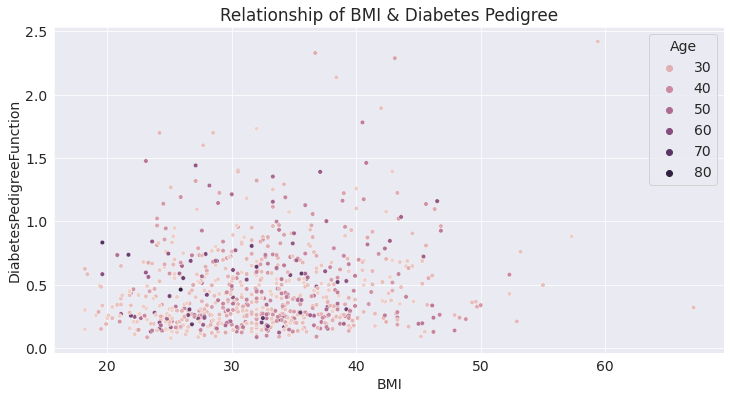

In [40]:
plt.title("Relationship of BMI & Diabetes Pedigree")

sns.scatterplot(diabetes_raw.BMI, diabetes_raw.DiabetesPedigreeFunction, s = 20,  hue = diabetes_raw.Age)

Through this scatter plot, we can see that a higher BMI between 30 to 50 can result in a higher diabetes Pedigree as they show a mildly positive relationship.

# Exploring Age and Glucose levels in participants.

In [41]:
insulin_and_glu = diabetes_raw.groupby('Age')['Glucose'].mean()

Firstly, I find the mean glucose levels among every age. Then, I'd plot them out.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


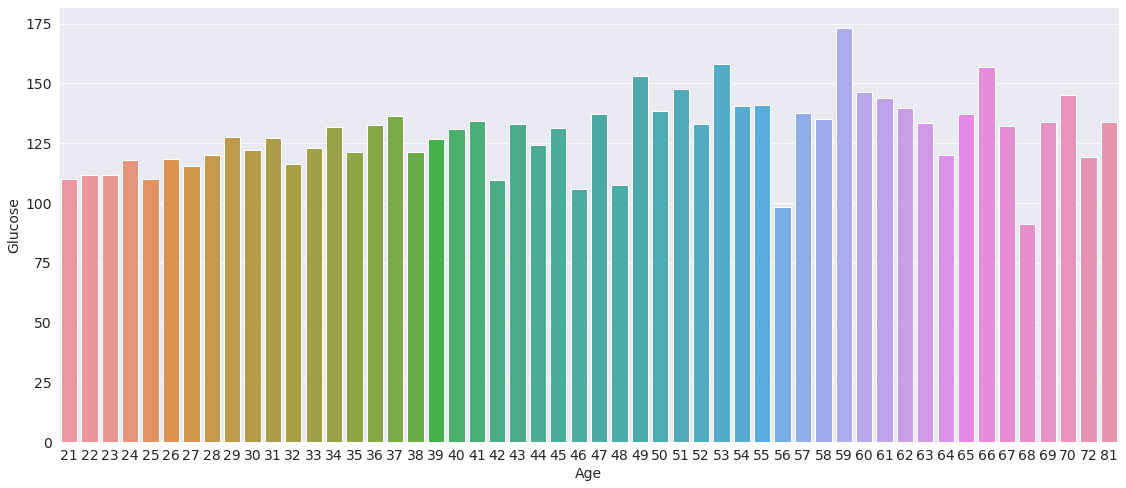

In [42]:
plt.figure(figsize=(19,8))
sns.barplot(insulin_and_glu.index, insulin_and_glu)
plt.show()

Glucose levels are measured in mg/dL

From my inference, we can way older participants aged 49 to 66 have a high average glucose level from the normal 99 mg/dL levels for a healthy individual.

However, assuming the higher the age of the participant the higher the glucose levels is not reliable. Participants aged 42, 46, 48, 56 and 68 have a vastly lower and healthy glucose levels than other participants within the high average glucose level range given.

Younger participants aged 28 to 38 also have above-average glucose levels. This shows that age is not a definite correlation to glucose levels.

Let us save and upload our work to Jovian before continuing

In [43]:
import jovian

In [44]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "alphajack2006/diabetes-prediction-data" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/alphajack2006/diabetes-prediction-data


'https://jovian.com/alphajack2006/diabetes-prediction-data'

## Asking and Answering Questions

TODO - write some explanation here.



#### Q1: What is the correlation between BMI, diabetes pedigree, and Outcome? (among the participants)

In [45]:
import numpy as np

<AxesSubplot:xlabel='BMI', ylabel='Density'>

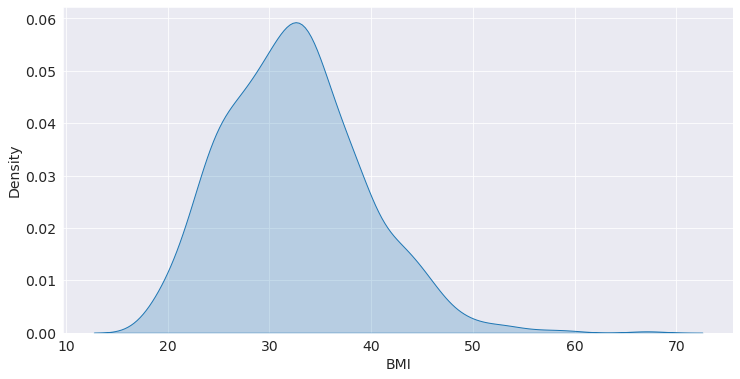

In [46]:
sns.kdeplot(diabetes_raw.BMI, shade=True)

<AxesSubplot:ylabel='Frequency'>

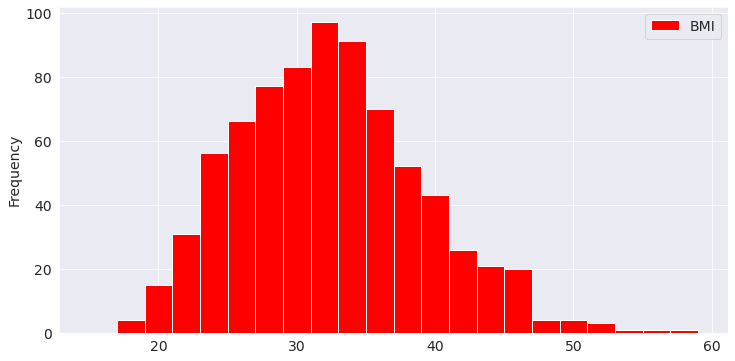

In [47]:
BMI_data = diabetes_raw[['BMI']]
BMI_data.plot(kind='hist', color='Red', bins= np.arange(15,60,2))

Through both graphs, we can infer that most participants have BMI within the 30 to 35 range.

#### Q2: TODO - What middle-age is most likely to get diabetes? 30 - 50 yrs

In [48]:
diabetes_chance = diabetes_raw.groupby(['Age'])['DiabetesPedigreeFunction', 'Outcome'].mean()

/tmp/ipykernel_57/2482465978.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  diabetes_chance = diabetes_raw.groupby(['Age'])['DiabetesPedigreeFunction', 'Outcome'].mean()


In [49]:
start_age = 29
end_age = 51
diabetes_chance.query('Age > @start_age and Age < @end_age', inplace= True)
# this command lets me pick out a range of ages
diabetes_chance

DiabetesPedigreeFunction   Outcome
Age                                    
30                   0.367238  0.285714
31                   0.589583  0.541667
32                   0.613250  0.562500
33                   0.734176  0.588235
34                   0.649857  0.285714
35                   0.454000  0.500000
36                   0.472875  0.625000
37                   0.414632  0.315789
38                   0.413938  0.625000
39                   0.605917  0.250000
40                   0.376077  0.461538
41                   0.396273  0.590909
42                   0.388000  0.388889
43                   0.450846  0.846154
44                   0.668375  0.625000
45                   0.496467  0.533333
46                   0.426846  0.538462
47                   0.355333  0.666667
48                   0.456800  0.200000
49                   0.612000  0.600000
50                   0.470125  0.625000

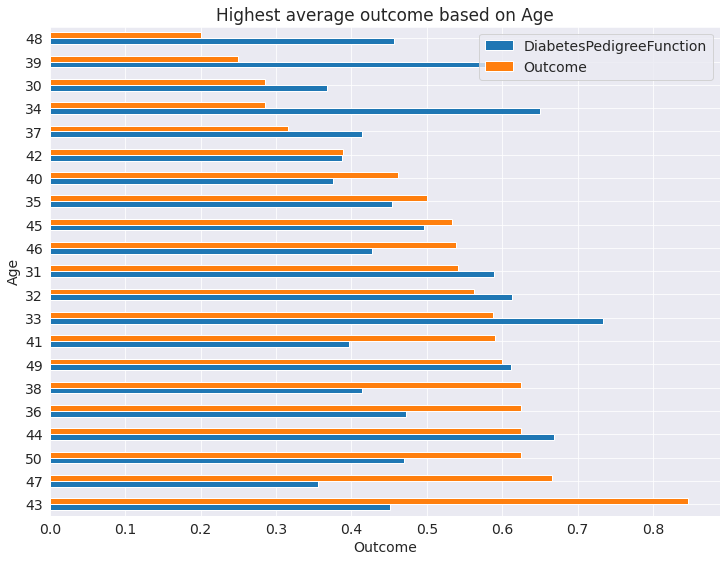

In [50]:
diabetes_chance.sort_values('Outcome', ascending = False).plot(kind = 'barh', figsize = (12,9), title ="Highest average outcome based on Age").set_xlabel("Outcome")
plt.show()
# we will plot the graph

As seen through the graph, we can note that participants aged 43 have the highest mean Outcome of an 84% chance. That said, we must note that participants aged 33 has the highest Diabetes pedigree amongst every age.

#### Q3: What is the relation between insulin and age?

In [51]:
insulin_age = diabetes_raw.groupby('Age')[['Insulin']].mean()

In [52]:
insulin_age

Insulin
Age            
21    87.190476
22    86.770833
23   126.052632
24    97.967391
25    94.333333
26    99.196970
27    80.281250
28   106.800000
29   104.568966
30    98.642857
31   126.416667
32    54.875000
33    96.352941
34   161.142857
35    87.200000
36    82.968750
37    76.921053
38    58.281250
39    85.125000
40    88.730769
41    62.386364
42    79.916667
43   134.538462
44    58.937500
45    53.500000
46   128.730769
47    64.416667
48    64.200000
49    73.500000
50    49.250000
51   137.000000
52   117.375000
53   195.200000
54    81.333333
55    99.000000
56    89.333333
57    96.300000
58   180.928571
59   302.333333
60   182.500000
61   110.250000
62    30.500000
63    67.875000
64    30.500000
65    30.500000
66    30.500000
67    30.500000
68    30.500000
69    30.500000
70    30.500000
72    30.500000
81    60.000000

Text(0, 0.5, 'Insulin level')

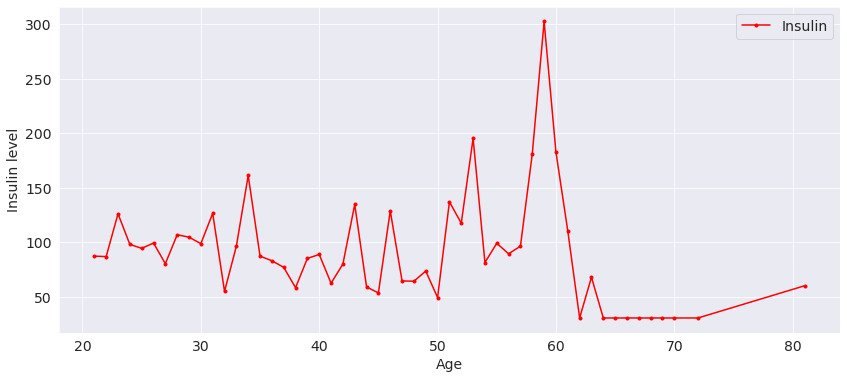

In [53]:
graphed = insulin_age.plot(color = 'red', marker='.', figsize=(14,6))
graphed.set_ylabel("Insulin level")

Through the graph and data frame, we can infer that being older can result in having a higher average insulin level. However, other variables may come into play.

#### Q4: Does having more/less pregnancies affect one's diabetes pedigree? 

In [54]:
dia_preg = diabetes_raw.groupby('Pregnancies')['DiabetesPedigreeFunction'].mean()

In [55]:
dia_preg

Pregnancies
0     0.520838
1     0.486496
2     0.491660
3     0.432147
4     0.446353
5     0.396421
6     0.429520
7     0.443622
8     0.504711
9     0.550679
10    0.454167
11    0.522545
12    0.444333
13    0.463300
14    0.312000
15    0.153000
17    0.817000
Name: DiabetesPedigreeFunction, dtype: float64

Text(0.5, 0, 'Diabetes Pedigree Function average')

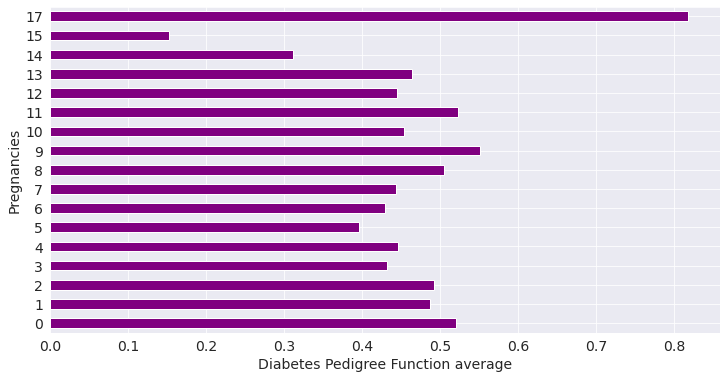

In [56]:
dia_preg.plot(kind='barh', color = 'purple').set_xlabel("Diabetes Pedigree Function average")

This graph shows a moderately even distribution of the number of pregnancies with the diabetes pedigree function: Participants who've experienced 0 or 1 pregnancies have a slightly higher or slightly lower pedigree compared to those with >1 pregnancies.

One outlier to take note of is the participant(s) with 17 pregnancies having the highest pedigree amongst every participants. This is likely due to the number of participants who have 17 pregnancies are very minimal, thus making the mean pedigree higher. The data may be unreliable to account for participants with higher pregnancies.
It is possible to take note of the other participants with a larger number of pregnancies by using other participants as estimations to calculate the pedigree.


The pedigree function is not entirely dictated by the number of pregnancies.

#### Q5: How does Bloodpressure affect Skin thickness?

In [57]:
diabetes_raw

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35     30.5  33.6   
1              1       85             66             29     30.5  26.6   
2              8      183             64             23     30.5  23.3   
3              1       89             66             23     94.0  28.1   
4              0      137             40             35    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48    180.0  32.9   
764            2      122             70             27     30.5  36.8   
765            5      121             72             23    112.0  26.2   
766            1      126             60             23     30.5  30.1   
767            1       93             70             31     30.5  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BloodPressure', ylabel='SkinThickness'>

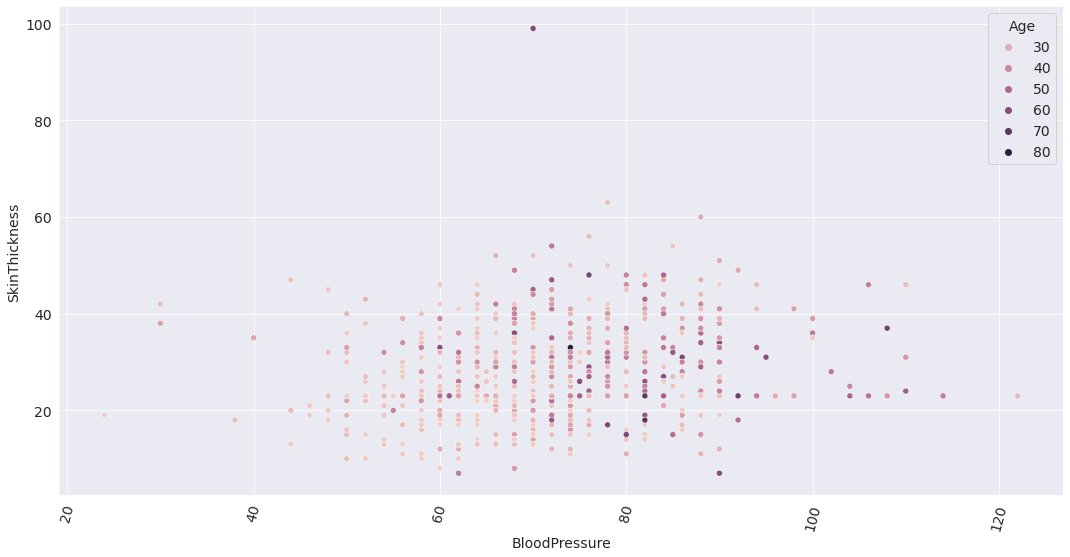

In [58]:
plt.figure(figsize=(18,9))
plt.xticks(rotation=75)
plt.title("")
sns.scatterplot(diabetes_raw.BloodPressure, diabetes_raw.SkinThickness,hue=diabetes_raw.Age)

Through the scatterplot, we can see that the bloodpressure and skin thickness have a positive relationship- the higher the B.P, the higher the Skin Thickness. However, there are some outliers, such as a participant having a B.P of 120, but low skin thickness of 25.

Let us save and upload our work to Jovian before continuing.

In [59]:
import jovian

In [ ]:
jovian.commit()

## Inferences and Conclusion

Diabetes prediction can be determined through numerous variables, such as their Blood glucose level, Insulin [hormone] levels, family history( Diabetes pedigree function: like genetics) and much more. This project has made me more aware of some hints of getting diabetes.

Additionally, I've picked up new functions and ways to represent data. 

In [60]:
import jovian

In [61]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "alphajack2006/diabetes-prediction-data" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/alphajack2006/diabetes-prediction-data


'https://jovian.com/alphajack2006/diabetes-prediction-data'

## References and Future Work

I would do more projects that require me to depict relationships between different variables, such as other health issues.

References used:
https://pandas.pydata.org/docs/
https://seaborn.pydata.org/
https://www.w3schools.com/python/pandas/default.asp
https://stackoverflow.com/questions/tagged/pandas

In [64]:
import jovian

In [65]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "alphajack2006/diabetes-prediction-data" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/alphajack2006/diabetes-prediction-data


'https://jovian.com/alphajack2006/diabetes-prediction-data'